In [1]:
import pandas as pd

# Read the CSV file
df_ident = pd.read_csv('train_identity.csv')
df_trans = pd.read_csv('train_transaction.csv')

In [2]:
# Show the contents
df_ident.shape

(144233, 41)

In [3]:
df_trans.shape

(590540, 394)

In [4]:
df_merge_col = pd.merge(df_trans, df_ident, on='TransactionID', how='left')

In [5]:
df_merge_col.shape

(590540, 434)

In [6]:
len(df_merge_col[df_merge_col["isFraud"]==1])/len(df_merge_col)*100

3.4990009144173126

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
plt.figure(figsize=(300,40))

<Figure size 21600x2880 with 0 Axes>

<Figure size 21600x2880 with 0 Axes>

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

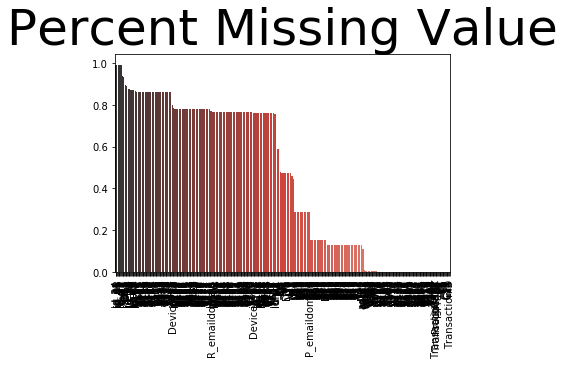

In [9]:
sns.barplot(y=df_merge_col.isnull().sum().sort_values(ascending=False)/len(df_merge_col),x=df_merge_col.isnull().sum().sort_values(ascending=False).index,palette="Reds_d")
plt.title("Percent Missing Value", size=50)
plt.xticks(rotation=90)

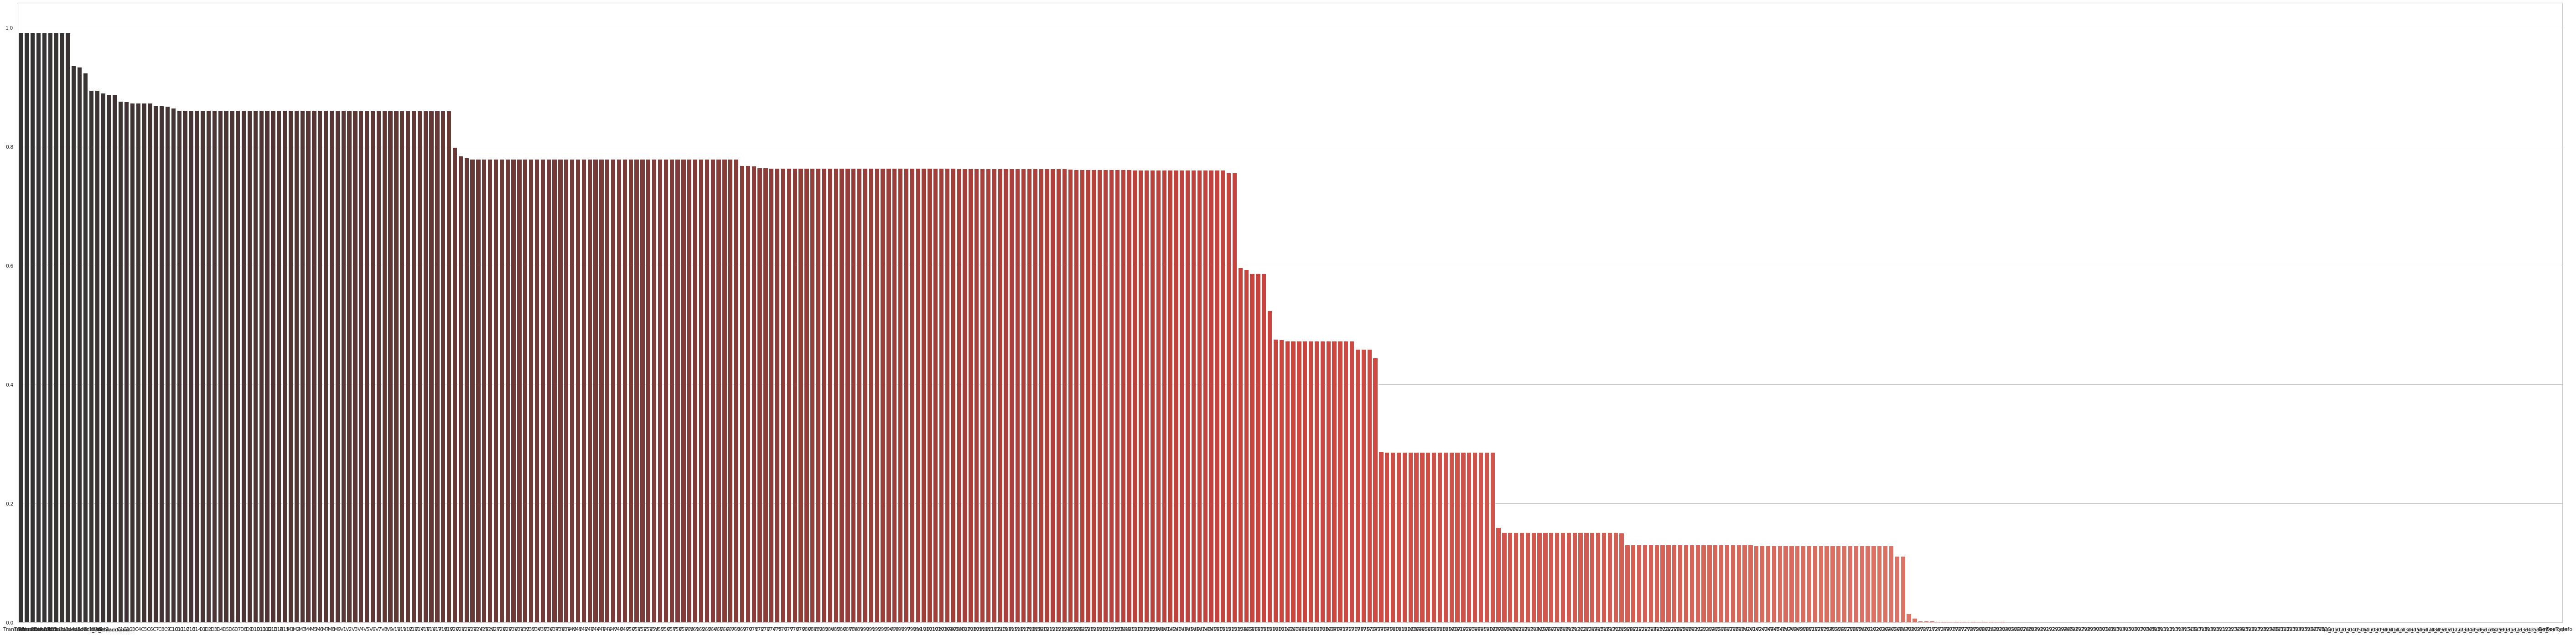

In [13]:
sns.set(style = "whitegrid")
plt.figure(figsize=(100,25))
p = sns.barplot(x =df_merge_col.isnull().sum().sort_values(ascending=False).index, y = df_merge_col.isnull().sum().sort_values(ascending=False)/len(df_merge_col),palette="Reds_d")
p.set_xticklabels(list(df_merge_col.columns))
p

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
columns_def=pd.DataFrame({"na_count":df_merge_col.isnull().sum().sort_values(ascending=False)})

In [16]:
columns_def["per"]=columns_def["na_count"]/len(df_merge_col)

In [17]:
columns_def

,na_count,per
id_24,585793,0.991962
id_25,585408,0.991310
id_07,585385,0.991271
id_08,585385,0.991271
id_21,585381,0.991264
...,...,...
C11,0,0.000000
C12,0,0.000000
C13,0,0.000000
C14,0,0.000000


In [18]:
range=[0.05, 0.10, 0.15, 0.25, 0.40, 0.60, 0.75]

In [19]:
for i in range:
    print (columns_def[columns_def["per"]<i].shape[0]/df_merge_col.shape[1])

0.25806451612903225
0.25806451612903225
0.3686635944700461
0.41935483870967744
0.46543778801843316
0.5207373271889401
0.5207373271889401


In [20]:
limit=0.15

In [21]:
columns_final=columns_def[columns_def["per"]<limit].index
df_merge_col=df_merge_col[df_merge_col.columns.intersection(columns_final)]

In [22]:
df_merge_col.shape

(590540, 160)

In [23]:
df_merge_col[df_merge_col.select_dtypes(include=['object']).columns]

,ProductCD,card4,card6
0,W,discover,credit
1,W,mastercard,credit
2,W,visa,debit
3,W,mastercard,debit
4,H,mastercard,credit
...,...,...,...
590535,W,visa,debit
590536,W,mastercard,debit
590537,W,mastercard,debit
590538,W,mastercard,debit


In [24]:
df_merge_col.shape

(590540, 160)

In [25]:
card6_dummy_df=pd.get_dummies(df_merge_col["card6"])

In [26]:
card6_dummy_df

,charge card,credit,debit,debit or credit
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
590535,0,0,1,0
590536,0,0,1,0
590537,0,0,1,0
590538,0,0,1,0


In [27]:
df_merge_col=pd.concat([df_merge_col,card6_dummy_df],axis=1)

In [28]:
df_merge_col=df_merge_col._get_numeric_data()
df_merge_col=df_merge_col.dropna()
len(df_merge_col[df_merge_col["isFraud"]==1])/len(df_merge_col)*100

2.04579077462003

In [29]:
x_full_df=df_merge_col.drop(["isFraud"],axis=1)
y_full_df=df_merge_col["isFraud"]

In [30]:
X_train,X_test,y_train,y_test=train_test_split(x_full_df,y_full_df,test_size=0.50)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [32]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
lr.score(X_test, y_test)

0.9795810105684848

In [34]:
y_pred=lr.predict(X_test)

In [35]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'],margins=True)

Predicted,0,1,All
True,,,
0,214186,68,214254
1,4397,18,4415
All,218583,86,218669


In [36]:
recall_score(y_test, y_pred)

0.0040770101925254815